# 주제 : 전세계 국가별 행복지수 순위
---------
     
   
    - 다음 6개의 csv 파일을 사용합니다.
    2015.csv
    2016.csv
    2017.csv
    2018.csv
    2019.csv
    2020.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Country: 국가
    Region: 국가의 지역
    Happiness Rank: 행복지수 순위
    Happiness Score: 행복지수 점수
    GDP per capita: 1인당 GDP
    Healthy Life Expectancy: 건강 기대수명
    Social support: 사회적 지원
    Freedom to make life choices: 삶에 대한 선택의 자유
    Generosity: 관용
    Corruption Perception: 부정부패
    Dystopia + Residual: 그 외

    
- 데이터 출처: https://www.kaggle.com/mathurinache/world-happiness-report

## 최종 목표
    - 전문가에 의해 작성된 데이터 분석해보기
    - 시간적으로 변하는 데이터의 Plot 방법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

---

## Step 0. 행복지수 데이터에 대하여

### 전문가에 의해 작성된 데이터

### 행복지수 점수의 구성에 대하여


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 파일 불러오기


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv


### 2. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
df = dict()
df['2015'] = pd.read_csv('2015.csv')
df['2016'] = pd.read_csv('2016.csv')
df['2017'] = pd.read_csv('2017.csv')
df['2018'] = pd.read_csv('2018.csv')
df['2019'] = pd.read_csv('2019.csv')
df['2020'] = pd.read_csv('2020.csv')

In [ ]:
df['2020']

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


## Step 2. 데이터프레임 구성하기


### 3. 년도별 데이터 표준화하기


In [ ]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [ ]:
# 각 년도별로 다른 정보를 가진 데이터 프레임의 Column을 동일하게 표준화하기
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust', 'residual']

In [ ]:
df['2015'].drop(['Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True) # generosity, trust 순서 반대
df['2016'].drop(['Region', 'Happiness Rank', 'Lower Confidence Interval',
                 'Upper Confidence Interval'], axis=1, inplace=True) # generosity, trust 순서 반대
df['2017'].drop(['Happiness.Rank', 'Whisker.high', 'Whisker.low'], axis=1, inplace=True) 
df['2018'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2019'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2020'].drop(['Regional indicator', 'Standard error of ladder score', 
                 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
                 'Social support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity',
                 'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True)

In [ ]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)
df['2019']['residual'] = df['2019']['Score'] - df['2019'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

In [ ]:
df['2016'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]
df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]

In [ ]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life 

In [ ]:
for key in df:
  df[key].columns = cols

### 4. 하나의 데이터프레임으로 합치기


In [ ]:
# 아래 셀과 동일한 데이터프레임으로 결합하기
df_all = pd.concat(df, axis=0)
df_all.index.names = ['year', 'rank']
df_all

country   score  ...     trust  residual
year rank                                    ...                    
2015 0                  Switzerland  7.5870  ...  0.419780  2.517380
     1                      Iceland  7.5610  ...  0.141450  2.702010
     2                      Denmark  7.5270  ...  0.483570  2.492040
     3                       Norway  7.5220  ...  0.365030  2.465310
     4                       Canada  7.4270  ...  0.329570  2.451760
...                             ...     ...  ...       ...       ...
2020 148   Central African Republic  3.4759  ...  0.028265  2.860198
     149                     Rwanda  3.3123  ...  0.485542  0.548445
     150                   Zimbabwe  3.2992  ...  0.080929  0.841031
     151                South Sudan  2.8166  ...  0.111157  1.378751
     152                Afghanistan  2.5669  ...  0.001226  1.507236

[935 rows x 9 columns]

In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

country   score  ...  generosity  residual
year rank                                    ...                      
2015 0                  Switzerland  7.5870  ...    0.296780  2.517380
     1                      Iceland  7.5610  ...    0.436300  2.702010
     2                      Denmark  7.5270  ...    0.341390  2.492040
     3                       Norway  7.5220  ...    0.346990  2.465310
     4                       Canada  7.4270  ...    0.458110  2.451760
...                             ...     ...  ...         ...       ...
2020 148   Central African Republic  3.4759  ...    0.028265  2.860198
     149                     Rwanda  3.3123  ...    0.485542  0.548445
     150                   Zimbabwe  3.2992  ...    0.080929  0.841031
     151                South Sudan  2.8166  ...    0.111157  1.378751
     152                Afghanistan  2.5669  ...    0.001226  1.507236

[935 rows x 9 columns]

### 5. 원하는 형태로 데이터프레임 정리하기

In [ ]:
# 아래 셀과 동일한 데이터프레임으로 변형하기
df_all.reset_index(inplace=True)
df_all['rank'] += 1
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

,year,rank,country,score,economy,family,health,freedom,trust,generosity,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


### 6. Pivot을 이용하여 데이터프레임 재구성하기

In [ ]:
# 아래 셀과 동일한 데이터프레임 구성하기
rank_table = df_all.pivot(index='country', columns=['year'], values='rank')
rank_table.sort_values('2020', inplace=True)
rank_table.head(20)

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0
Austria,13.0,12.0,13.0,12.0,10.0,9.0


In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0
Austria,13.0,12.0,13.0,12.0,10.0,9.0


## Step 3. 데이터 시각화 수행하기

### 7. 년도별 순위 변화 시각화하기

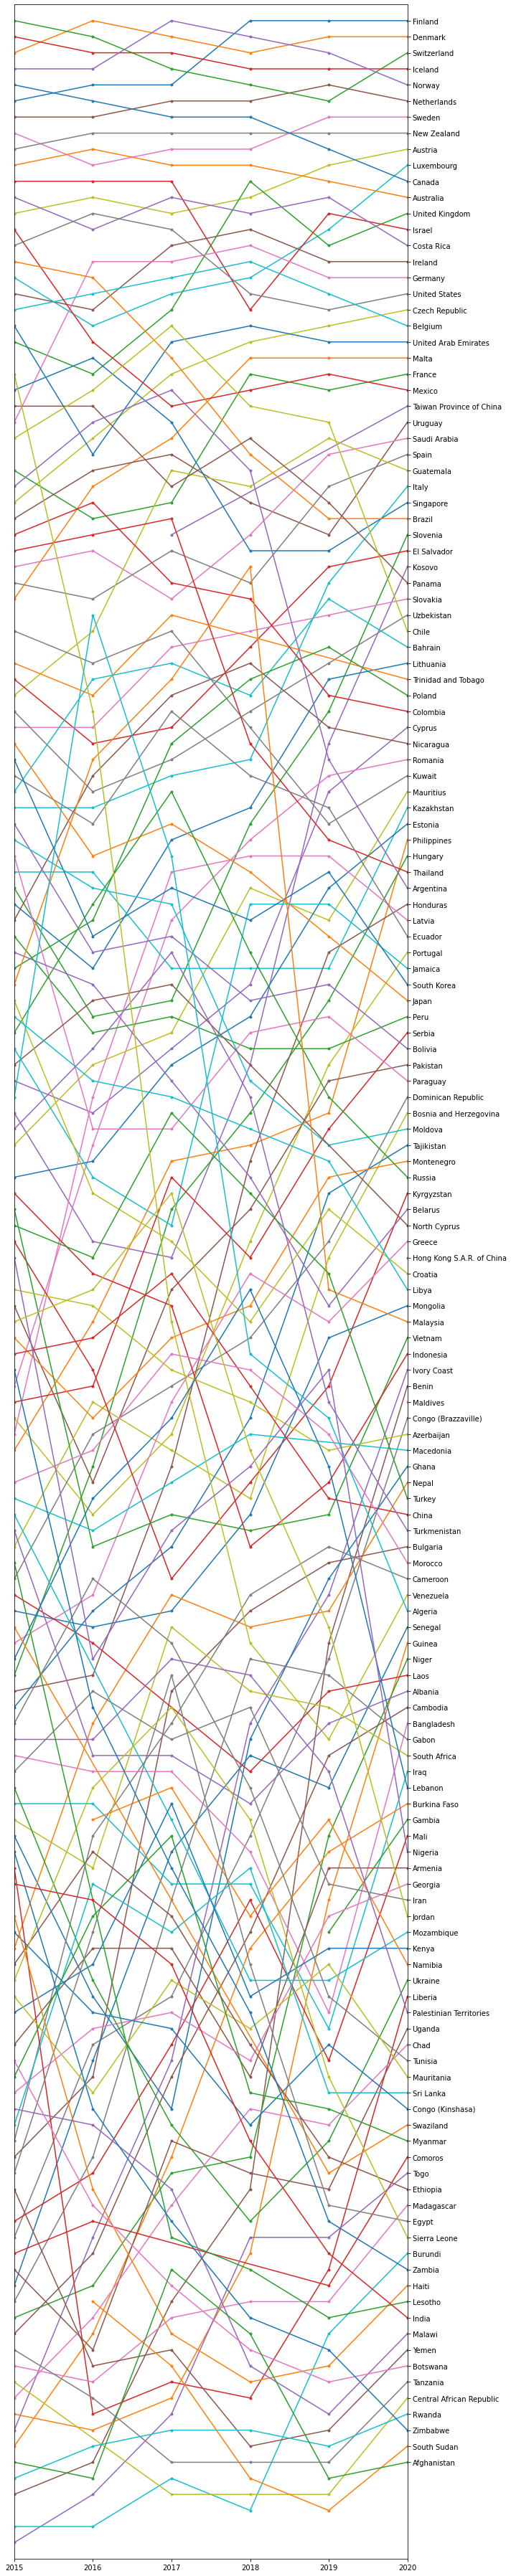

In [ ]:
# 아래 셀과 동일하게 년도별 순위 변화를 시각화하기

fig = plt.figure(figsize=(10, 50))
rank2020 = rank_table['2020'].dropna()
for c in rank2020.index:
  t = rank_table.loc[c].dropna()
  plt.plot(t.index, t, '.-')

plt.xlim(['2015', '2020'])
plt.ylim([0, rank_table.max().max() + 1])
plt.yticks(rank2020, rank2020.index)
ax = plt.gca()
ax.invert_yaxis()
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.tight_layout()
plt.show()

### 8. 분야별로 나누어 점수 시각화하기

In [ ]:
# sns.barplot()을 이용하여 아래 셀과 동일하게 시각화하기
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


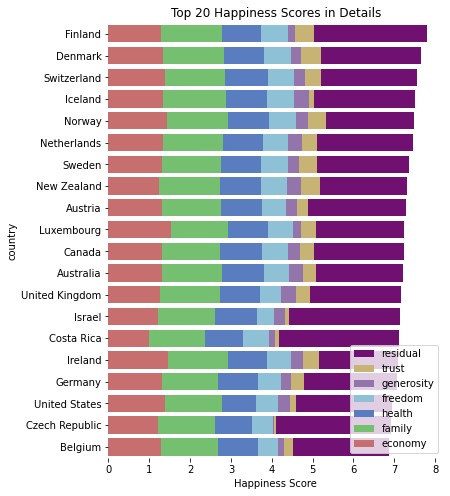

In [ ]:
  fig = plt.figure(figsize=(6, 8))
  data = df_all[df_all['year'] == '2020']
  data = data.loc[data.index[:20]]
  
  d = data[data.columns[4:]].cumsum(axis=1)
  d = d[d.columns[::-1]]
  d['country'] = data['country']
  
  sns.set_color_codes('muted')
  colors = ['r', 'g', 'b', 'c', 'm', 'y', 'purple'][::-1]
  for idx, c in enumerate(d.columns[:-1]):
    sns.barplot(x=c, y='country', data=d, label=c, color=colors[idx])
  
  plt.legend(loc='lower right')
  plt.title('Top 20 Happiness Scores in Details')
  plt.xlabel('Happiness Score')
  sns.despine(left=True, bottom=True)

### 9. Column간의 상관성 시각화하기

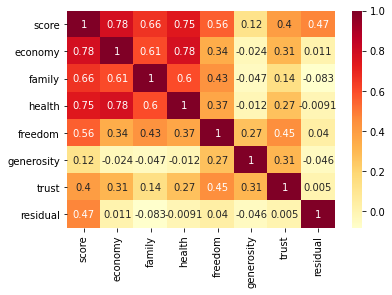

In [ ]:
# 상관성 Heatmap, Pairplot 등으로 상관성을 시각화하기
sns.heatmap(df_all.drop('rank', axis=1).corr(), annot=True, cmap='YlOrRd')

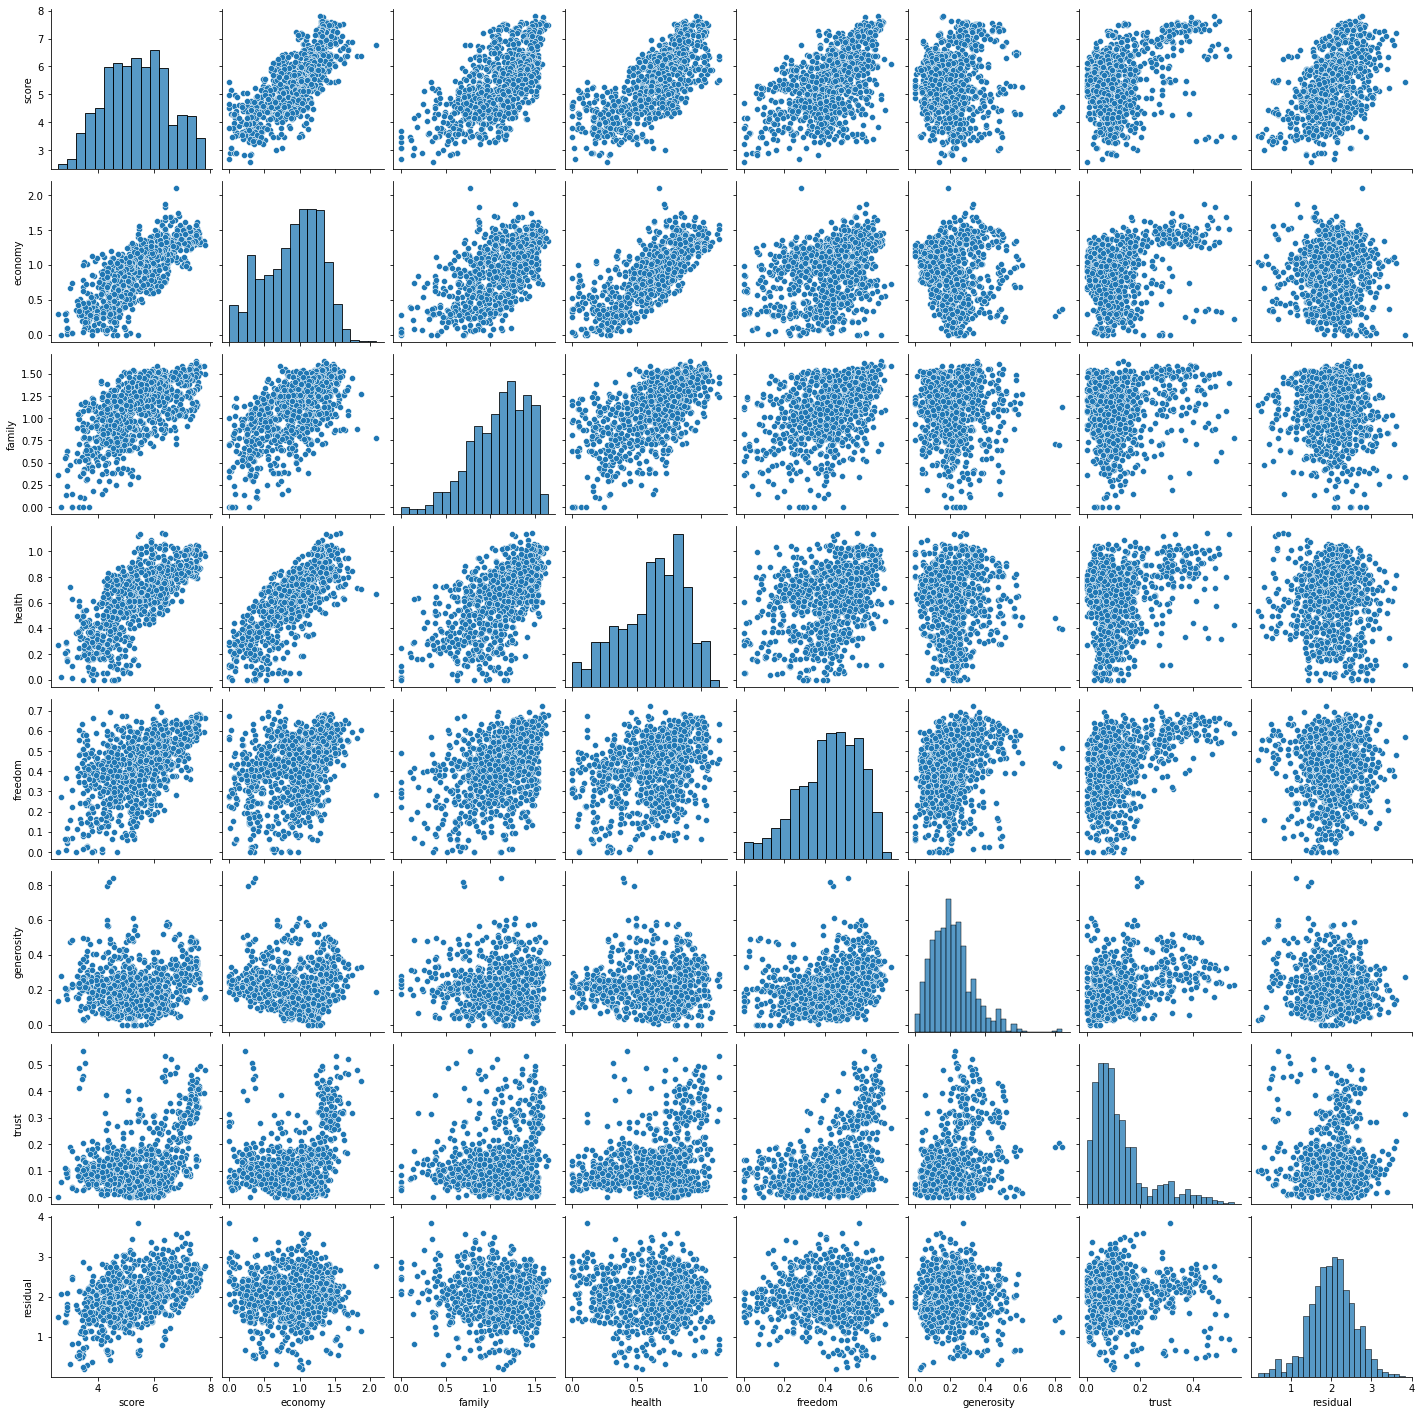

In [ ]:
sns.pairplot(df_all.drop('rank', axis=1))

## Step 4. 모델 학습을 위한 데이터 전처리 

### 10. 모델의 입력과 출력 정의하기

In [ ]:
# 학습할 모델의 입출력을 정의하시오. Column의 의미를 고려하여 선정하시오.
col_input_list = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']
col_out = 'score'

### 11. 학습데이터와 테스트데이터 분리하기


In [ ]:
# 2015년 ~ 2019년도 데이터를 학습 데이터로, 2020년도 데이터를 테스트 데이터로 분리하기
df_train = df_all[df_all['year'] != '2020']
df_test = df_all[df_all['year'] == '2020']

X_train = df_train[col_input_list]
y_train = df_train[col_out]
X_test = df_test[col_input_list]
y_test = df_test[col_out]

### 12. StandardScaler를 이용해 학습 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 학습 데이터를 표준화하기
scaler = StandardScaler()
scaler.fit(X_train)

X_norm = scaler.transform(X_train)
X_train = pd.DataFrame(X_norm, index=X_train.index, columns=X_train.columns)

X_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_norm, index=X_test.index, columns=X_test.columns)

## Step 5. Regression 모델 학습하기

### 13. Linear Regression 모델 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train.fillna(0, inplace=True)

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 14. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_lr.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.4411766043832984
0.5666831855845988


### 15. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[00:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 16. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.4008115506377966
0.5032488531532971


## Step 6. 모델 학습 결과 심화 분석하기


### 17. 실제 값과 추측 값의 Scatter plot 시각화하기


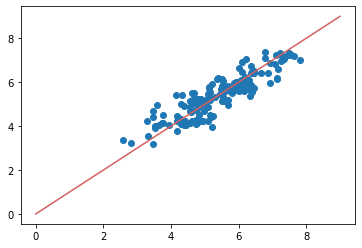

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(x=y_test, y=pred)
plt.plot([0, 9], [0, 9], 'r-')
plt.show()

### 18. LinearRegression 모델의 Coefficient 시각화하기


<BarContainer object of 6 artists>

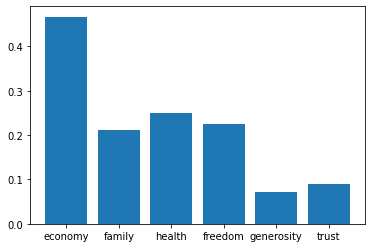

In [ ]:
# model_lr.coef_ 시각화하기
plt.bar(X_train.columns, model_lr.coef_)

### 19. XGBoost 모델의 Feature Importance 시각화하기


<BarContainer object of 6 artists>

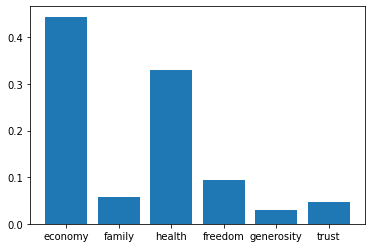

In [ ]:
# model_xgb.feature_importance_ 시각화하기
plt.bar(X_train.columns, model_xgb.feature_importances_)

##결론
LinearRegression 분석결과: economy, family, health, freedom, genorosity, trust 순으로 높게 측정된다.

XGBRegressor 분석결과 : economy, health, freedom, family, trust, enerosity 순으로 높게 측정된다.


*economy(경제수준)이 가장 큰영향을 미친다 하지만 경제수준만 높다고 행복하다고 할 수 있을까? 답은 No다. health(건강,기대수명),family(원만한 가족관계,사회적 지원) 역시 행복지수에 어느 정도 영향을 끼친다고 볼수 있다.

